<a href="https://colab.research.google.com/github/Kavya2099/British-Airways-virtual-internship/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
df

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...
...,...
995,✅ Trip Verified | London to Shanghai. The Con...
996,Not Verified | I have often flown British Air...
997,Not Verified | Good morning. I would like to ...
998,✅ Trip Verified | My flight was cancelled 3 da...


Removing the parts before | in the reviews column

In [11]:
df.reviews= df.reviews.str.split('|',expand=True)[1]



In [12]:
df

,reviews
0,London Heathrow to Male In new business cla...
1,Very good flight following an equally good f...
2,An hour's delay due to late arrival of the i...
3,I booked through BA because Loganair don’t ...
4,British airways lost bags in LHR then found...
...,...
995,London to Shanghai. The Concorde room in Hea...
996,I have often flown British Airways and have ...
997,Good morning. I would like to write a review...
998,My flight was cancelled 3 days in a row. Was ...














*Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [15]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...
1,Very good flight following an equally good f...,Very good flight following an equally good fl...
2,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...
3,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...
4,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [18]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...


In [37]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ..."
1,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa..."
2,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...,"[(hour, n), (delay, n), (due, a), (late, a), (..."
3,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...,"[(booked, v), (BA, n), (Loganair, n), (represe..."
4,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,..."


In [38]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [39]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [40]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ...",London Heathrow Male new business class BA c...
1,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good flight follow equally good flight Rome ...
2,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...,"[(hour, n), (delay, n), (due, a), (late, a), (...",hour delay due late arrival incoming aircraf...
3,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...,"[(booked, v), (BA, n), (Loganair, n), (represe...",book BA Loganair representative Manchester a...
4,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find Sent Cologn...


In [41]:
df[['reviews','Lemma']]

,reviews,Lemma
0,London Heathrow to Male In new business cla...,London Heathrow Male new business class BA c...
1,Very good flight following an equally good f...,good flight follow equally good flight Rome ...
2,An hour's delay due to late arrival of the i...,hour delay due late arrival incoming aircraf...
3,I booked through BA because Loganair don’t ...,book BA Loganair representative Manchester a...
4,British airways lost bags in LHR then found...,British airway lose bag LHR find Sent Cologn...
...,...,...
995,London to Shanghai. The Concorde room in Hea...,London Shanghai Concorde room Heathrow Termi...
996,I have often flown British Airways and have ...,often fly British Airways consider good airl...
997,Good morning. I would like to write a review...,Good morning would like write review British...
998,My flight was cancelled 3 days in a row. Was ...,flight cancel day row fly Thursday finally d...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [43]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/f9/9b/335f9764261e915ed497fcdeb11df5dfd6f7bf257d4a6a2a686d80da4d54/requests-2.32.3-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/1e/ab/45b180e175de4402dcf7547e4fb617283bae54ce35c27930a6f35b6bef15/charset_normalizer-3.4.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/76/c6/c88e154df9c4e1a2a66ccf0005a88dfb2650c1dffb6f5ce603dfbd452ce3/idna-3.10-py3-none-any.whl.metadata
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/c8/19/4ec628951a74043532ca2cf5d97b7b148639


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Avita\AppData\Roaming\nltk_data...


True

In [51]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,London Heathrow to Male In new business cla...,London Heathrow to Male In new business class...,"[(London, n), (Heathrow, n), (Male, n), (new, ...",London Heathrow Male new business class BA c...,0.9863,Positive
1,Very good flight following an equally good f...,Very good flight following an equally good fl...,"[(good, a), (flight, n), (following, v), (equa...",good flight follow equally good flight Rome ...,0.8271,Positive
2,An hour's delay due to late arrival of the i...,An hour s delay due to late arrival of the in...,"[(hour, n), (delay, n), (due, a), (late, a), (...",hour delay due late arrival incoming aircraf...,0.8442,Positive
3,I booked through BA because Loganair don’t ...,I booked through BA because Loganair don t ha...,"[(booked, v), (BA, n), (Loganair, n), (represe...",book BA Loganair representative Manchester a...,0.0552,Neutral
4,British airways lost bags in LHR then found...,British airways lost bags in LHR then found t...,"[(British, a), (airways, n), (lost, v), (bags,...",British airway lose bag LHR find Sent Cologn...,-0.5994,Negative


In [53]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    457
Negative    430
Neutral     113
Name: count, dtype: int64

# Visual Representation

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x22c3bbc9880>,
 [Text(0.1481458317165507, 1.0899783541635182, 'Positive'),
  Text(-0.517774380628802, -0.9705203196041085, 'Negative'),
  Text(1.2658227549838803, -0.46924700634635863, 'Neutral')],
 [Text(0.08080681729993675, 0.5945336477255553, '45.7%'),
  Text(-0.2824223894338919, -0.529374719784059, '43.0%'),
  Text(0.7969995123972579, -0.29545181881067023, '11.3%')])

In [77]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [80]:
import sys
!{sys.executable} -m pip install wordcloud

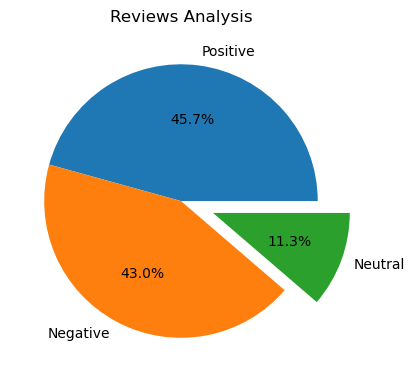

In [81]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)